# Pre-processing of UNSW Dataset

Pre-processing UNSW dataset, cleaning and handling values discrepancies. All four CSV files are combined and processed before exporting it to combined CSV file.

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
input_dir = "./UNSW_CSVs/"
output_file = "./UNSW-NB15_preprocessed.csv"

In [7]:
# Reading of all 4 csv files of UNSW
dfs = []
for i in range(1, 5):
    path = input_dir + f"/UNSW-NB15_{i}.csv"  # There are 4 input csv files
    dfs.append(pd.read_csv(path, header=None, low_memory=False))
all_data = pd.concat(dfs).reset_index(drop=True)

# Adding Column names to the CSV file
df_col = pd.read_csv(input_dir + "/NUSW-NB15_features.csv", encoding="ISO-8859-1")
df_col["Name"] = df_col["Name"].apply(lambda x: x.strip().replace(" ", "").lower())
all_data.columns = df_col["Name"]
print(all_data.shape)

(2540047, 49)


In [8]:
# Exploring Data for missing Values
all_data.isnull().sum()
# attack_cat has no label for normal data instances
# ct_flw_http_mthd & is_ftp_login has missing values

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [9]:
# Instead of removing the rows having missing value, here we have removed these two columns
all_data.drop(columns=["ct_flw_http_mthd", "is_ftp_login"], inplace=True)

In [10]:
all_data.isin([np.inf, -np.inf]).values.sum()
# No inf data instances

0

In [11]:
all_data["attack_cat"].value_counts()  # Inconsistency in Attack labels

Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: attack_cat, dtype: int64

In [12]:
# Replacing Missing value with normal in attack_cat column. Moreover, removing adddtional spaces and converting labels to lower case
all_data["attack_cat"] = all_data.attack_cat.fillna(value="normal").apply(lambda x: x.strip().lower())

In [13]:
all_data["attack_cat"] = all_data["attack_cat"].replace("backdoors", "backdoor", regex=True).apply(lambda x: x.strip().lower())

In [14]:
all_data.isnull().values.any()
# No more missing value

False

In [15]:
all_data["attack_cat"].value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: attack_cat, dtype: int64

In [16]:
all_data["service"].value_counts()

-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [17]:
# removing all the "-" and replacing those with "None"
all_data["service"] = all_data["service"].apply(lambda x: "None" if x == "-" else x)

In [18]:
all_data.ct_ftp_cmd.unique()

array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', '4', '2', ' '], dtype=object)

In [19]:
all_data["ct_ftp_cmd"] = all_data["ct_ftp_cmd"].apply(lambda x: 0 if x == " " else x).astype(int)
## One or more values are in string, converting to int

In [20]:
all_data.shape

(2540047, 47)

In [21]:
df = all_data[all_data.duplicated(keep=False)]
## Checking Duplicate Values

In [22]:
df.shape

(568841, 47)

In [23]:
df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
7,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,normal,0
10,10.40.170.2,0,10.40.170.2,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,normal,0
11,10.40.170.2,0,10.40.170.2,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,normal,0
12,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,normal,0
70,59.166.0.6,15807,149.171.126.7,53,udp,CON,0.001118,132,164,31,...,0,12,8,5,3,3,2,2,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540034,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,normal,0
2540035,59.166.0.5,53521,149.171.126.7,21,tcp,CON,1.086072,1940,2404,31,...,2,2,2,3,3,2,2,3,normal,0
2540040,59.166.0.9,61886,149.171.126.1,21,tcp,CON,3.108071,1148,1402,31,...,2,2,2,2,4,2,2,3,normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,normal,0


In [24]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)
print(all_data.loc[[7, 12], :])
pd.reset_option("display.max_columns")
pd.reset_option("display.width")

Name        srcip sport        dstip dsport proto state  dur  sbytes  dbytes  sttl  dttl  sloss  dloss service  sload  dload  spkts  dpkts  swin  \
7     10.40.182.3     0  10.40.182.3      0   arp   INT  0.0      46       0     0     0      0      0    None    0.0    0.0      1      0     0   
12    10.40.182.3     0  10.40.182.3      0   arp   INT  0.0      46       0     0     0      0      0    None    0.0    0.0      1      0     0   

Name  dwin  stcpb  dtcpb  smeansz  dmeansz  trans_depth  res_bdy_len  sjit  djit       stime       ltime  sintpkt  dintpkt  tcprtt  synack  ackdat  \
7        0      0      0       46        0            0            0   0.0   0.0  1421927415  1421927415      0.0      0.0     0.0     0.0     0.0   
12       0      0      0       46        0            0            0   0.0   0.0  1421927415  1421927415      0.0      0.0     0.0     0.0     0.0   

Name  is_sm_ips_ports  ct_state_ttl  ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_

In [25]:
all_data.drop_duplicates(inplace=True)
all_data.shape

(2059415, 47)

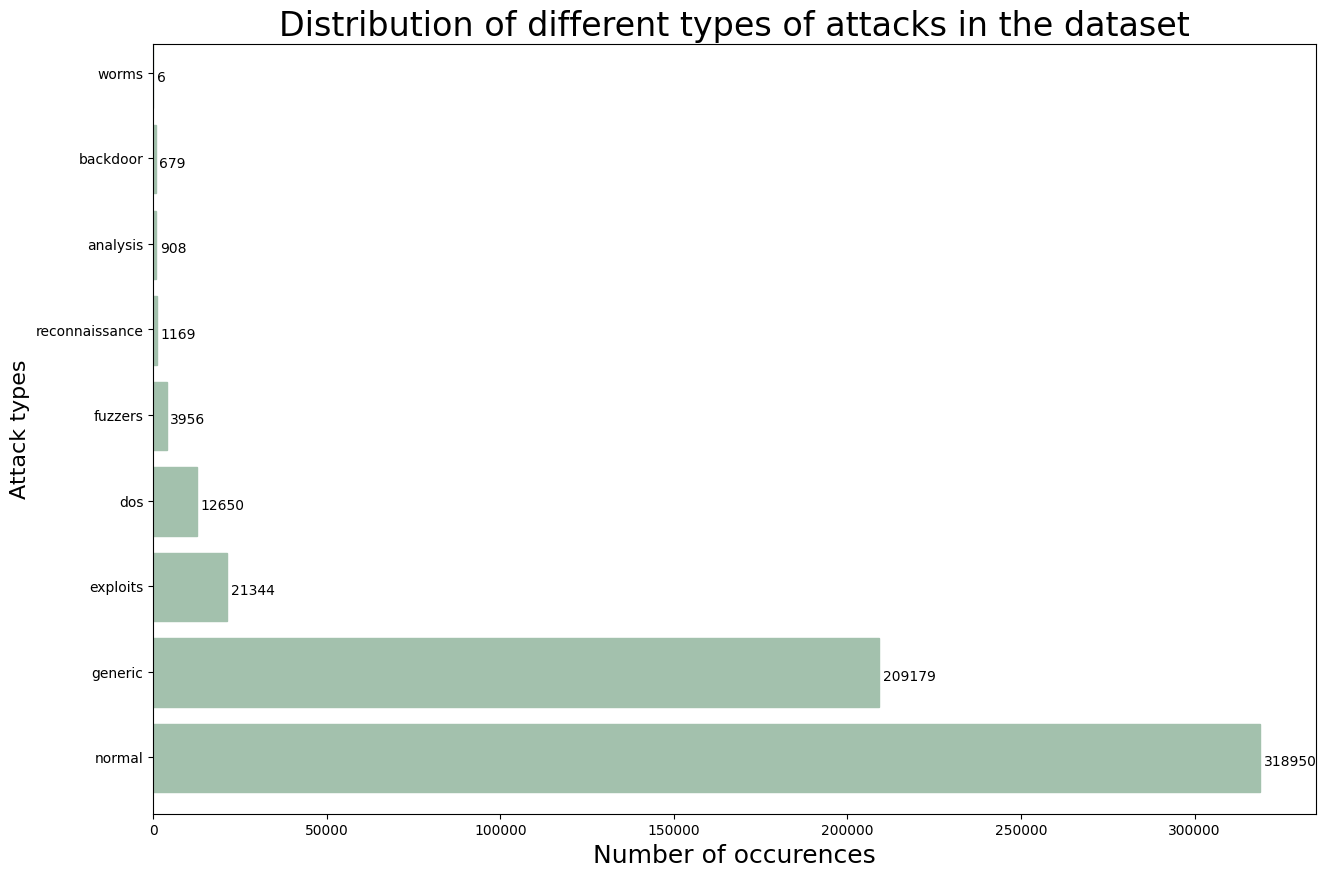

In [26]:
attack_counts = df["attack_cat"].value_counts()
ax = attack_counts.plot(kind="barh", figsize=(15, 10), position=0.82)
_ = ax.set_title("Distribution of different types of attacks in the dataset", fontsize=24)
_ = ax.set_xlabel("Number of occurences", fontsize=18)
_ = ax.set_ylabel("Attack types", fontsize=16)

for bar in ax.containers:
    plt.setp(bar, color="#a3c1ad", height=0.8)

for i, v in enumerate(attack_counts):
    plt.text(v + 1000, i - 0.1, str(v))

## Handling protocol Values
The top 24 most common protocols are left, plus a few specialty protocols.  Everything else is converted to "other" so it matches the packet parsing.

In [27]:
pd.set_option("display.max_rows", None)
Important_protocol = all_data.proto[all_data.label == 1].value_counts()
print(Important_protocol)
pd.reset_option("display.max_rows")

tcp            54197
udp            33114
unas            4765
ospf             993
sctp             444
any              138
gre               95
rsvp              92
ipv6              85
sep               81
sun-nd            81
swipe             81
mobile            81
pim               81
nvp               51
snp               51
secure-vmtp       51
emcon             51
vmtp              51
etherip           46
encap             46
ax.25             46
aes-sp3-d         46
micp              46
pri-enc           46
gmtp              46
ipip              46
nsfnet-igp        46
mtp               46
larp              46
sprite-rpc        46
eigrp             46
tcf               46
dgp               46
ifmp              46
ttp               46
vines             46
iso-ip            46
wb-expak          46
wb-mon            46
pnni              46
ipcomp            46
aris              46
smp               46
fc                46
iplt              46
pipe              46
sps          

In [28]:
b = Important_protocol.keys()[25:]
## Retain these protocols
b = b.drop("gmtp")
b = b.drop("ipip")
b = b.drop("larp")
b = b.drop("dgp")
b = b.drop("pnni")
b = b.drop("fc")
b = b.drop("iplt")
b = b.drop("pipe")
b = b.drop("sps")
b = b.drop("sccopmce")
b = b.drop("crudp")
b = b.drop("crtp")
b = b.drop("fire")
b = b.drop("rvd")
b = b.drop("rdp")
b = b.drop("hmp")
b = b.drop("pup")
b = b.drop("egp")
b = b.drop("ip")
b = b.drop("ib")
b

Index(['nsfnet-igp', 'mtp', 'sprite-rpc', 'eigrp', 'tcf', 'ifmp', 'ttp',
       'vines', 'iso-ip', 'wb-expak', 'wb-mon', 'ipcomp', 'aris', 'smp',
       'isis', 'ptp', 'sm', 'uti', 'stp', 'qnx', 'srp', 'l2tp', 'ddx', 'iatp',
       'pgm', 'zero', 'vrrp', 'ipx-n-ip', 'compaq-peer', 'pvp', 'scps', 'a/n',
       'br-sat-mon', 'wsn', 'merit-inp', 'netblt', 'iso-tp4', 'irtp', 'leaf-2',
       'leaf-1', 'trunk-2', 'xns-idp', 'trunk-1', 'prm', 'dcn', 'mux', 'chaos',
       'bbn-rcc', 'argus', 'xnet', 'igp', 'cbt', 'st2', 'ggp', 'ipnip',
       'mfe-nsp', '3pc', 'cphb', 'xtp', 'cpnx', 'visa', 'ipcv', 'sat-mon',
       'ippc', 'kryptolan', 'sat-expak', 'cftp', 'ipv6-opts', 'skip', 'tlsp',
       'ipv6-no', 'narp', 'i-nlsp', 'bna', 'mhrp', 'ipv6-route', 'sdrp',
       'ipv6-frag', 'idrp', 'il', 'idpr-cmtp', 'ddp', 'tp++', 'idpr'],
      dtype='object')

In [29]:
all_data["proto"].replace(b, "others", inplace=True)

In [30]:
all_data.proto.value_counts()  ### We have only considered the top 30 protocols and rest are being labelled as others
### Same is done in the parser(built for getting information from pcap files)

tcp            1448859
udp             588026
arp               6658
unas              4765
ospf              3964
others            3864
icmp               498
sctp               444
any                138
gre                 95
rsvp                92
ipv6                85
sep                 81
swipe               81
sun-nd              81
mobile              81
pim                 81
igmp                54
emcon               51
nvp                 51
snp                 51
vmtp                51
secure-vmtp         51
fire                46
pri-enc             46
gmtp                46
pnni                46
crudp               46
crtp                46
iplt                46
fc                  46
encap               46
sccopmce            46
sps                 46
pipe                46
etherip             46
dgp                 46
aes-sp3-d           46
micp                46
ipip                46
ax.25               46
larp                46
rvd                 46
rdp        

In [31]:
all_data.attack_cat.value_counts()

normal            1959772
exploits            27599
generic             25378
fuzzers             21795
reconnaissance      13357
dos                  5665
analysis             2184
backdoor             1983
shellcode            1511
worms                 171
Name: attack_cat, dtype: int64

In [32]:
all_data.label.value_counts()

0    1959772
1      99643
Name: label, dtype: int64

In [33]:
Path(output_file).parent.mkdir(parents=True, exist_ok=True)
all_data.to_csv(output_file, index=False)

In [34]:
all_data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'],
      dtype='object', name='Name')